In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
from Model import modelFit

In [4]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0


In [5]:
glm = LogisticRegression()

In [6]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=144, shuffle=True, stratify=Y) 

In [8]:
print('Logistic regression on dataset')
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
glm.fit(X_train, Y_train)
r2_train = np.round(glm.score(X_train, Y_train),3)
r2_test  = np.round(glm.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Logistic regression on dataset
Train score is :0.647
Test score is :0.668


In [9]:
c_param = [10.0**i for i in np.arange(-5,5,1)]
class_weight = ['auto','balanced']
penalty = ['l1', 'l2','none']
solver = ["newton-cg", "sag", "saga", "lbfgs"]
warm_start = True

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
glm = LogisticRegression()
glm.set_params(warm_start = True, max_iter = 1e4)
grid_param = {'C':c_param, 'class_weight' : class_weight, 'penalty':penalty, 'solver':solver}
glm_cv = GridSearchCV(glm, grid_param, cv = 3, return_train_score = True)
%time glm_cv.fit(X_train, Y_train)

CPU times: total: 5min 9s
Wall time: 5min 12s


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000.0, warm_start=True),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                               100.0, 1000.0, 10000.0],
                         'class_weight': ['auto', 'balanced'],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             return_train_score=True)

In [12]:
glm_df = pd.DataFrame(data = glm_cv.cv_results_)
glm_df.to_csv('LogisticRegression.csv')

In [13]:
glm_df.dropna(axis=0, how = 'any', inplace=True)

In [14]:
glm_final_df = glm_df.loc[:,['param_C','param_class_weight','param_penalty','param_solver','mean_train_score',
                            'mean_test_score']]

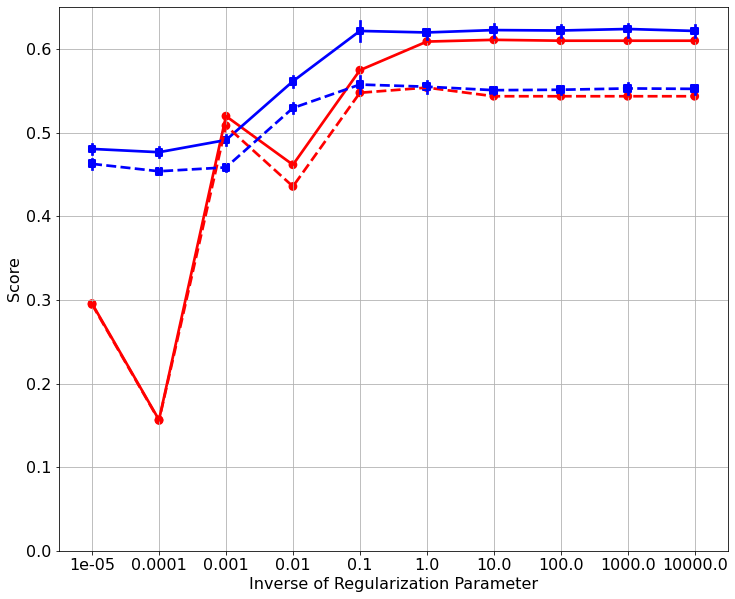

In [15]:
fig, ax = plt.subplots(1,1, figsize = (12,10))

df = glm_final_df.copy()

sns.pointplot(data = df.loc[df['param_penalty']=='l1',:], x = 'param_C', y = 'mean_train_score', ax = ax, color = 'red',
                 s = 120, markers = 'o',  legend=True)

sns.pointplot(data = df.loc[df['param_penalty']=='l2',:], x = 'param_C', y = 'mean_train_score', ax = ax, color = 'blue',
                 s = 120, markers = 's', legend=True)

sns.pointplot(data = df.loc[df['param_penalty']=='l1',:], x = 'param_C', y = 'mean_test_score', ax = ax, color = 'red',
                 s = 120, markers = 'o', linestyles = '--', legend=True)

sns.pointplot(data = df.loc[df['param_penalty']=='l2',:], x = 'param_C', y = 'mean_test_score', ax = ax, color = 'blue',
                 s = 120, markers = 's', linestyles = '--', legend=True)

ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Inverse of Regularization Parameter', fontsize= 16)
ax.set_ylabel('Score', fontsize= 16)
ax.grid()
ax. set_ylim([0, 0.65]);

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
print('Logistic regression on dataset')
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
glm.fit(X_train, Y_train)
r2_train = np.round(glm.score(X_train, Y_train),3)
r2_test  = np.round(glm.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Logistic regression on dataset
Train score is :0.647
Test score is :0.668


In [18]:
Y_train_pred = glm.predict(X_train)
Y_test_pred = glm.predict(X_test)

In [19]:
conf_data_train = confusion_matrix(Y_train,Y_train_pred)
conf_data_test  = confusion_matrix(Y_test,Y_test_pred)

In [20]:
conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)

****************************************************************************************************


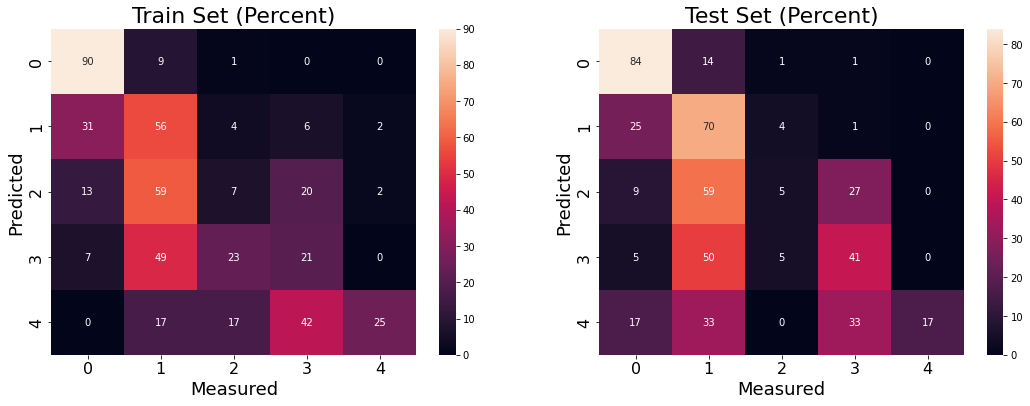

In [22]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set (Percent)',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set (Percent)',fontsize= 22);

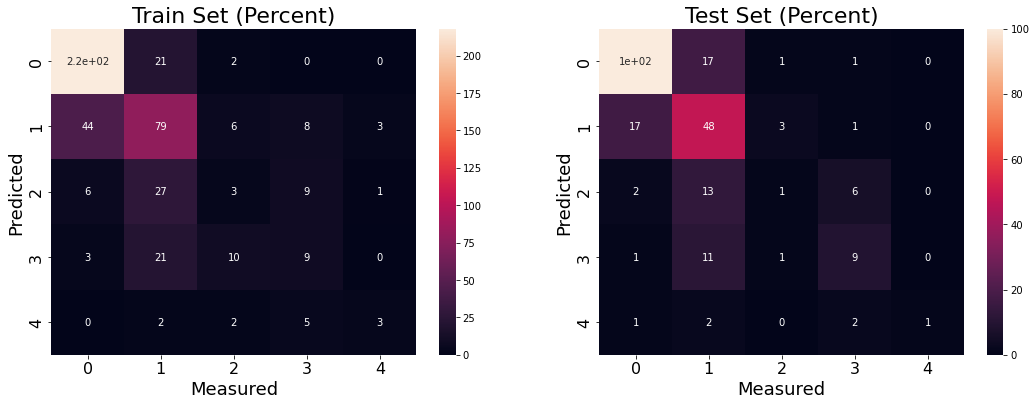

In [23]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_data_train, ax = ax[0], annot=True)
sns.heatmap(conf_data_test,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set (Percent)',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set (Percent)',fontsize= 22);

In [24]:
print('Type 1 percent is :' + str(np.round(100 * Y[Y==0].shape[0]/Y.shape[0],2)) + '%')
print('Type 2 percent is :' + str(np.round(100 * Y[Y==1].shape[0]/Y.shape[0],2)) + '%')
print('Type 3 percent is :' + str(np.round(100 * Y[Y==2].shape[0]/Y.shape[0],2)) + '%')
print('Type 4 percent is :' + str(np.round(100 * Y[Y==3].shape[0]/Y.shape[0],2)) + '%')
print('Type 5 percent is :' + str(np.round(100 * Y[Y==4].shape[0]/Y.shape[0],2)) + '%')

Type 1 percent is :50.0%
Type 2 percent is :29.03%
Type 3 percent is :9.44%
Type 4 percent is :9.03%
Type 5 percent is :2.5%


In [25]:
Y_decision = glm.decision_function(X)

In [26]:
Y_0 = Y_train==0
Y_1 = Y_train==1
Y_2 = Y_train==2
Y_3 = Y_train==3
Y_4 = Y_train==4

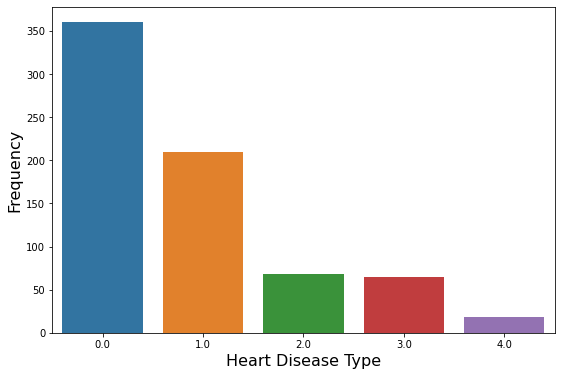

In [27]:
df = heart.groupby(['num'])['num'].aggregate(['count'])
df.reset_index(inplace=True)
fig, axis = plt.subplots(1,1,figsize=(9,6))
av = sns.barplot(data = df, x = 'num', y = 'count', ax = axis)

av.set_xlabel('Heart Disease Type', fontsize = 16)
av.set_ylabel('Frequency', fontsize = 16);

In [28]:
decision_values_train = glm.decision_function(X_train)
decision_values_test  = glm.decision_function(X_test)

In [29]:
data_train = np.hstack([decision_values_train, Y_0.values.reshape(-1,1), Y_1.values.reshape(-1,1), 
                       Y_2.values.reshape(-1,1), Y_3.values.reshape(-1,1), Y_4.values.reshape(-1,1)])

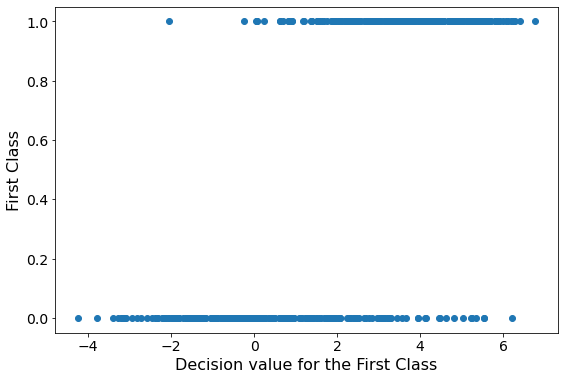

In [30]:
fig, ax = plt.subplots(1,1,figsize= (9,6))
ax.scatter(decision_values_train[:,0], Y_0)
ax.set_xlabel('Decision value for the First Class', fontsize = 16)
ax.set_ylabel('First Class', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

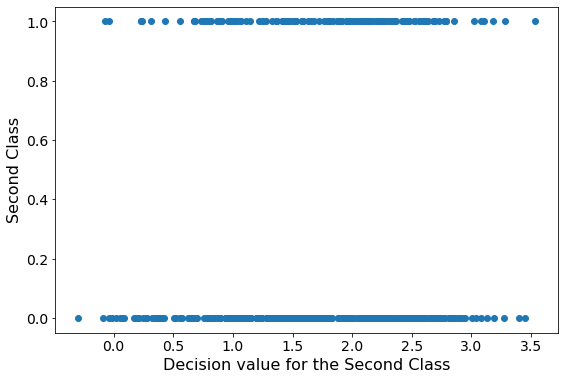

In [31]:
fig, ax = plt.subplots(1,1,figsize= (9,6))
ax.scatter(decision_values_train[:,1], Y_1)
ax.set_xlabel('Decision value for the Second Class', fontsize = 16)
ax.set_ylabel('Second Class', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

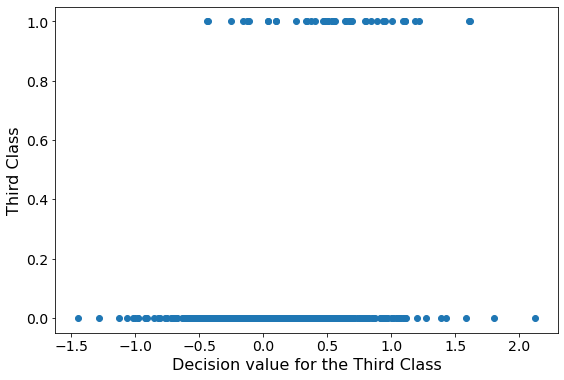

In [32]:
fig, ax = plt.subplots(1,1,figsize= (9,6))
ax.scatter(decision_values_train[:,2], Y_2)
ax.set_xlabel('Decision value for the Third Class', fontsize = 16)
ax.set_ylabel('Third Class', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

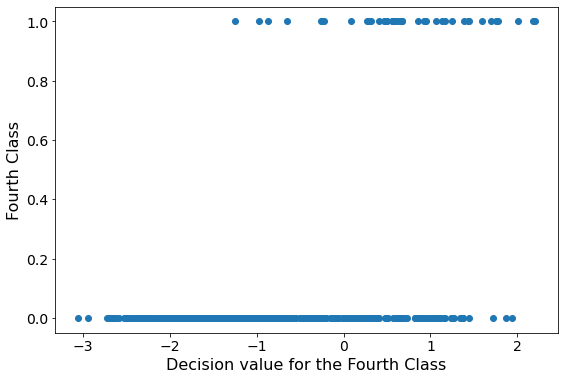

In [33]:
fig, ax = plt.subplots(1,1,figsize= (9,6))
ax.scatter(decision_values_train[:,3], Y_3)
ax.set_xlabel('Decision value for the Fourth Class', fontsize = 16)
ax.set_ylabel('Fourth Class', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

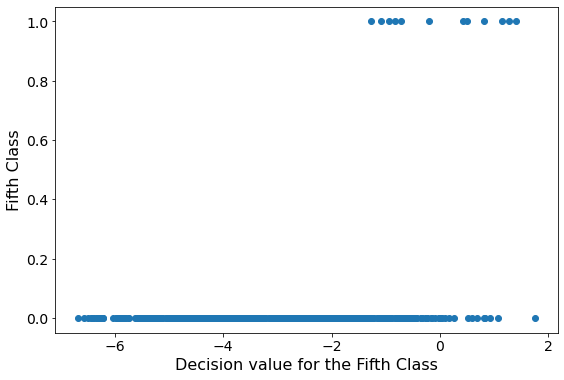

In [34]:
fig, ax = plt.subplots(1,1,figsize= (9,6))
ax.scatter(decision_values_train[:,4], Y_4)
ax.set_xlabel('Decision value for the Fifth Class', fontsize = 16)
ax.set_ylabel('Fifth Class', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);